In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Pour avoir l'auto complétion:
%config IPCompleter.greedy=True  

In [4]:
#lire notre banque de données en mettant la date en index
data=pd.read_csv('preprocessed_CAC40.csv',index_col='Date',parse_dates=True)

In [5]:
#On visualise le début de notre dataset.
data.head()

,Unnamed: 0,Name,Open,Closing_Price,Daily_High,Daily_Low,Volume
Date,,,,,,,
2020-04-03,0,Accor,22.99,23.40,23.40,22.99,67
2020-04-02,1,Accor,23.91,22.99,23.91,22.99,250
2020-04-01,2,Accor,24.10,23.83,24.10,23.83,37
2020-03-31,3,Accor,25.04,25.00,25.24,24.99,336
2020-03-30,4,Accor,26.50,25.02,26.50,24.99,415


In [6]:
#On supprime les colonnes qui nous intéresse pas.
data=data.drop(['Open','Closing_Price','Volume'], axis=1)
data.head()

,Unnamed: 0,Name,Daily_High,Daily_Low
Date,,,,
2020-04-03,0,Accor,23.40,22.99
2020-04-02,1,Accor,23.91,22.99
2020-04-01,2,Accor,24.10,23.83
2020-03-31,3,Accor,25.24,24.99
2020-03-30,4,Accor,26.50,24.99


In [7]:
data.describe()

,Unnamed: 0,Daily_High,Daily_Low
count,97648.00000,97444.000000,97444.000000
mean,48823.50000,69.145090,68.357316
std,28188.69388,77.646032,76.866258
min,0.00000,3.410000,3.350000
25%,24411.75000,24.960000,24.650000
50%,48823.50000,47.160000,46.640000
75%,73235.25000,82.220000,81.262500
max,97647.00000,724.000000,718.000000


In [8]:
#On enlève les lignes avec le Daily_High vide
data=data.dropna(axis=0)
data.describe()

,Unnamed: 0,Daily_High,Daily_Low
count,97444.000000,97444.000000,97444.000000
mean,48760.539099,69.145090,68.357316
std,28176.457654,77.646032,76.866258
min,0.000000,3.410000,3.350000
25%,24369.750000,24.960000,24.650000
50%,48732.500000,47.160000,46.640000
75%,73094.250000,82.220000,81.262500
max,97647.000000,724.000000,718.000000


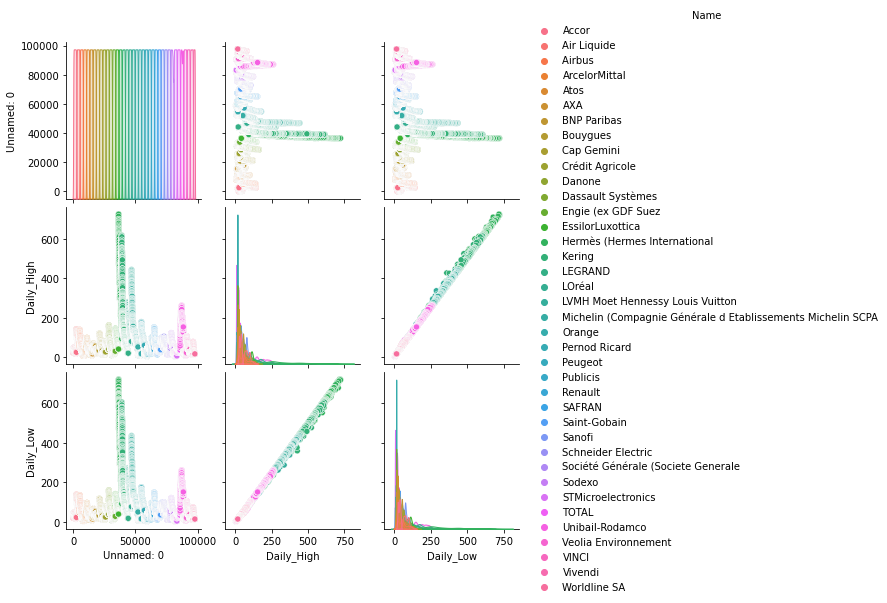

In [9]:
#On regarde la corrélation entre les variables
sns.pairplot(data, hue = 'Name')


Date
2014-01-05    AxesSubplot(0.125,0.2;0.775x0.68)
2014-01-19    AxesSubplot(0.125,0.2;0.775x0.68)
2014-02-02    AxesSubplot(0.125,0.2;0.775x0.68)
2014-02-16    AxesSubplot(0.125,0.2;0.775x0.68)
2014-03-02    AxesSubplot(0.125,0.2;0.775x0.68)
2014-03-16    AxesSubplot(0.125,0.2;0.775x0.68)
2014-03-30    AxesSubplot(0.125,0.2;0.775x0.68)
2014-04-13    AxesSubplot(0.125,0.2;0.775x0.68)
2014-04-27    AxesSubplot(0.125,0.2;0.775x0.68)
2014-05-11    AxesSubplot(0.125,0.2;0.775x0.68)
2014-05-25    AxesSubplot(0.125,0.2;0.775x0.68)
2014-06-08    AxesSubplot(0.125,0.2;0.775x0.68)
2014-06-22    AxesSubplot(0.125,0.2;0.775x0.68)
2014-07-06    AxesSubplot(0.125,0.2;0.775x0.68)
2014-07-20    AxesSubplot(0.125,0.2;0.775x0.68)
2014-08-03    AxesSubplot(0.125,0.2;0.775x0.68)
2014-08-17    AxesSubplot(0.125,0.2;0.775x0.68)
2014-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-09-14    AxesSubplot(0.125,0.2;0.775x0.68)
2014-09-28    AxesSubplot(0.125,0.2;0.775x0.68)
2014-10-12    AxesSubplot(0.125,0.2

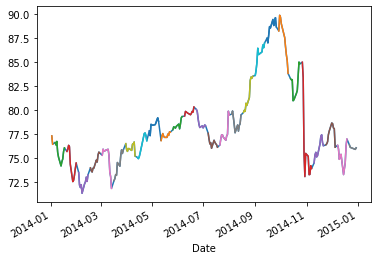

In [10]:
#On observe les Daily_High pour l'entreprise Sanofi découpé en périodes de 2 semaines sur 2014.
test=data[data['Name'] == 'Sanofi']
test.loc['2014']['Daily_High'].plot()
test.loc['2014']['Daily_High'].resample('2w').plot()

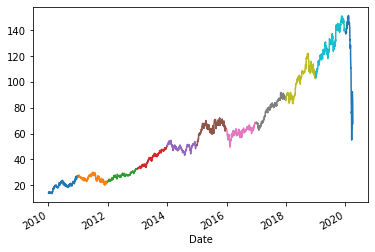

In [11]:
#On affiche l'évolution du Daily_High de l'entreprise Safran en découpant les années
annee=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
test=data[data['Name'] == 'SAFRAN']
for i in annee:
    test1=test.loc[i]['Daily_High'].plot()


In [12]:
Entreprise=['Sodexo','Air Liquide','Cap Gemini','Saint-Gobain','Vivendi']
#'SAFRAN'

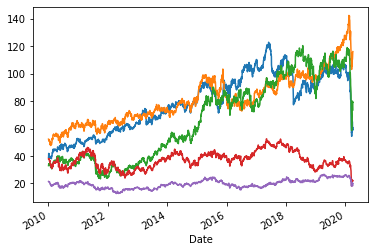

In [13]:
#On affiche l'évolution de plusieurs entreprises 
for j in Entreprise:
    entreprise=data[data['Name'] == j]
    entreprise.Daily_High.plot()

In [14]:
#On sélectionne les entreprises

p=data[data['Name'] == 'SAFRAN']
l=data[data['Name'] == 'Saint-Gobain']
t=data[data['Name'] == 'Vivendi']

frames = [p, l, t]

result = pd.concat(frames)

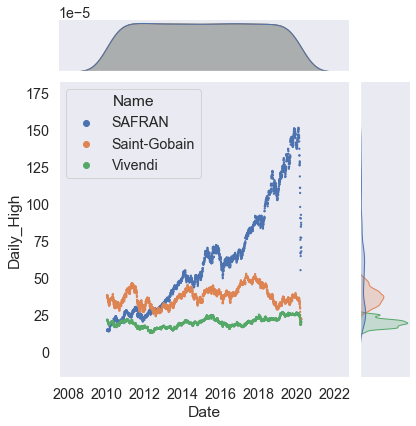

In [18]:
#On s'amuse avec un joli graphique
sns.set_style()
sns.set_context("notebook", font_scale=1.3)
sns.jointplot(data=result, x="Date", y="Daily_High", hue="Name",marker=".", s=20, linewidth=0)
